In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define the data directory and categories
data_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
categories = ['Normal', 'Osteopenia', 'Osteoporosis']
img_size = 100  # Resize images to 100x100

# Initialize lists to hold image data and labels
X = []
y = []

# Loop through each category
for label in categories:
    folder_path = os.path.join(data_dir, label)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize image
            img = img / 255.0  # Normalize pixel values
            X.append(img.flatten())  # Flatten the image
            y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)


In [ ]:
# Encode string labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

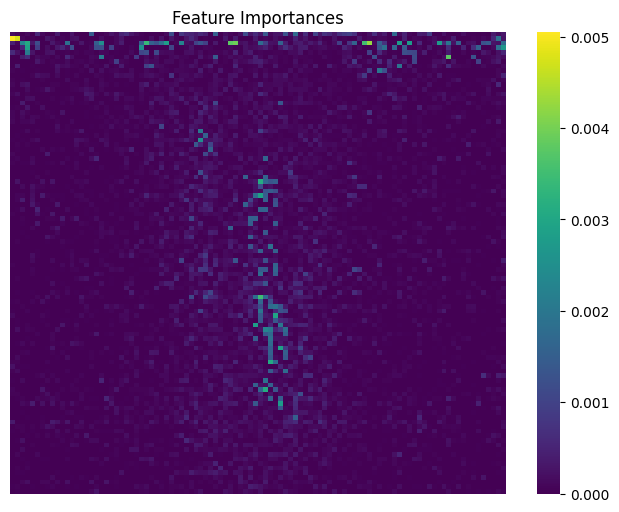

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Since images are flattened, we can reshape importances back to image shape
importances_image = importances.reshape(img_size, img_size)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.heatmap(importances_image, cmap='viridis')
plt.title("Feature Importances")
plt.axis('off')
plt.show()


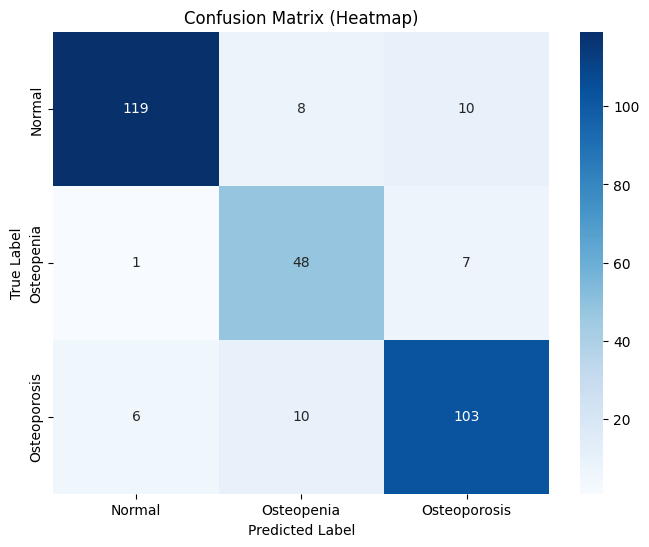

In [ ]:
import seaborn as sns
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Heatmap)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Accuracy: 0.8654
Classification Report:
               precision    recall  f1-score   support

      Normal       0.94      0.87      0.90       137
  Osteopenia       0.73      0.86      0.79        56
Osteoporosis       0.86      0.87      0.86       119

    accuracy                           0.87       312
   macro avg       0.84      0.86      0.85       312
weighted avg       0.87      0.87      0.87       312



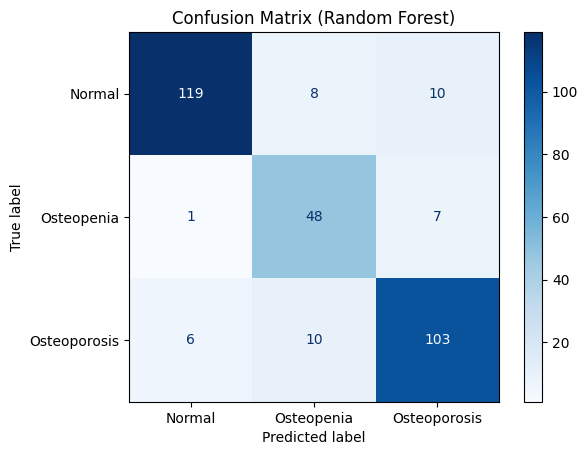

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred_rf, target_names=le.classes_)
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Random Forest)")
plt.show()


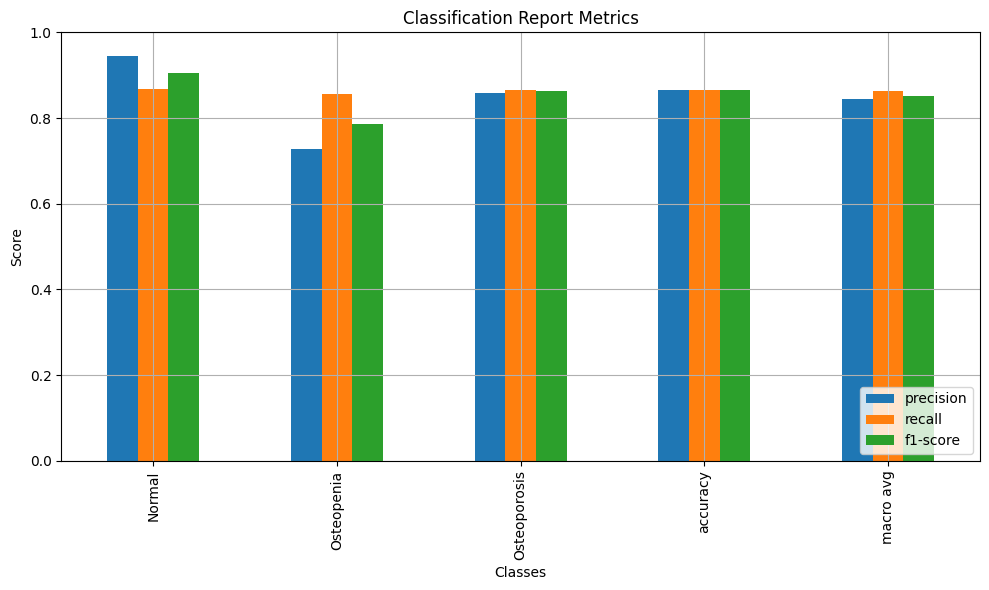

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score
report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 6))
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


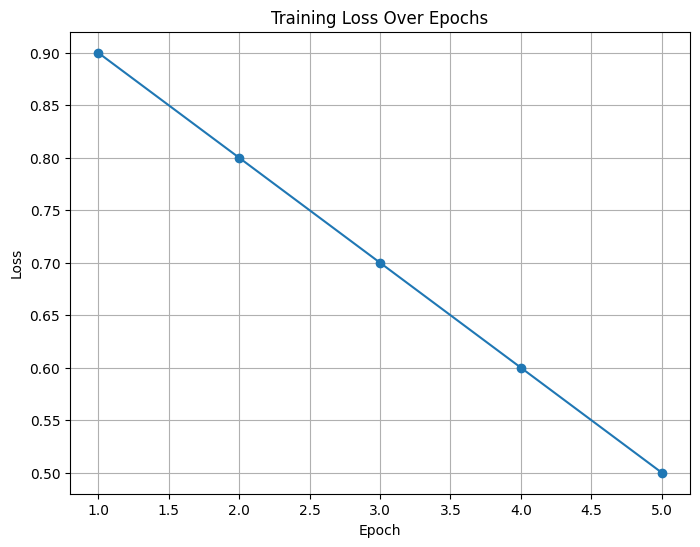

In [ ]:
import matplotlib.pyplot as plt

# Example list of loss values recorded at each epoch
loss_values = [0.9, 0.8, 0.7, 0.6, 0.5]  # Replace with your actual loss values

# Plotting the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
